POLYNOMIAL REGRESSION


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer


import data


In [13]:
df_sal=pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [14]:
df.sample(5)

,Position,Level,Salary
7,Senior Partner,8,300000
4,Country Manager,5,110000
3,Manager,4,80000
0,Business Analyst,1,45000
9,CEO,10,1000000


Analyze the data

In [15]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


Distribution

C:\Users\ASUS PC\AppData\Local\Temp\ipykernel_14388\3676038920.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sal['Salary'])


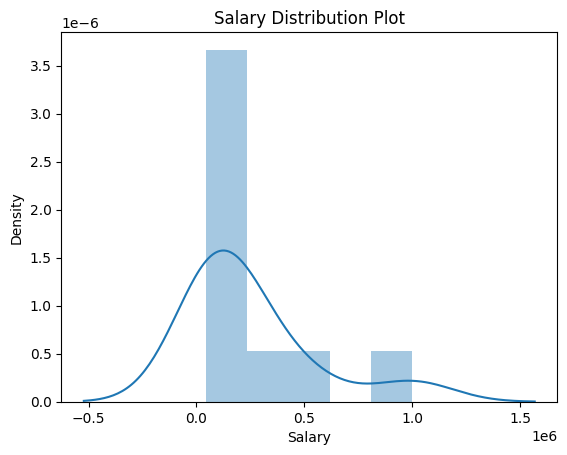

In [16]:
# Data distribution
plt.title('Salary Distribution Plot')
sns.distplot(df_sal['Salary'])
plt.show()

It is clearly visible now, our data varies like a polynomial parabolic curve. That means an individual's Salary grows exponentially as their Level increases.

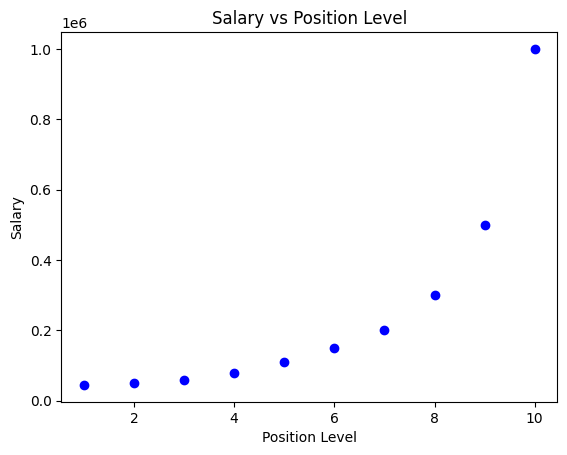

In [17]:
#relationship between level and salary
plt.Figure(figsize=(10,6))
plt.scatter(df_sal['Level'],df_sal['Salary'],color='blue')
plt.title('Salary vs Position Level')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Split data into Independent and dependent Variable

In [18]:
X=df_sal[['Level']] #independent 
y=df_sal['Salary'] #dependent


In [19]:
X


,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [20]:
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

TRAIN THE MODEL

In [21]:
#LINEAR REGRESSION
#train the data set 
lr= LinearRegression()
lr.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
#pollynomial regression
pr=PolynomialFeatures(degree=5)
X_poly=pr.fit_transform(X)
lr2=LinearRegression()
lr2.fit(X_poly,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
#predict  Result
y_pred_poly =lr2.predict(X_poly)
print(y_pred_poly)
y_pred_lr=lr.predict(X)
print(y_pred_lr)

[ 43895.10489603  53836.82983718  57065.26806579  77286.71328745
 112263.40326412 152736.59673702 201349.65034962 291571.09557057
 506617.71561662 998377.6223756 ]
[-114454.54545455  -33575.75757576   47303.03030303  128181.81818182
  209060.60606061  289939.39393939  370818.18181818  451696.96969697
  532575.75757576  613454.54545455]


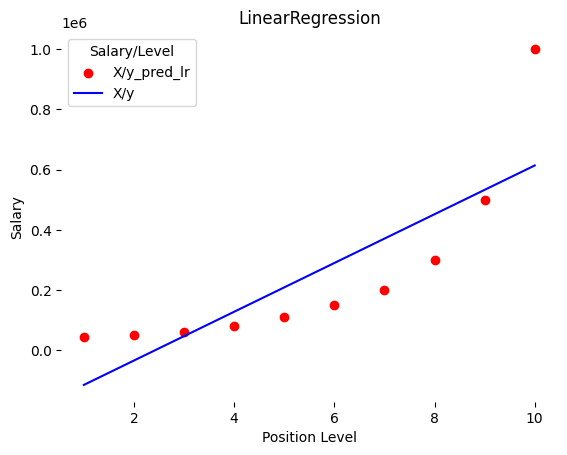

In [24]:
#visualise(prediction with linear regression )
plt.scatter(X,y,color='red')
plt.plot(X,y_pred_lr,color='blue')
plt.title('LinearRegression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred_lr','X/y'],title="Salary/Level", loc='best',facecolor='white')
plt.box(False)
plt.show()

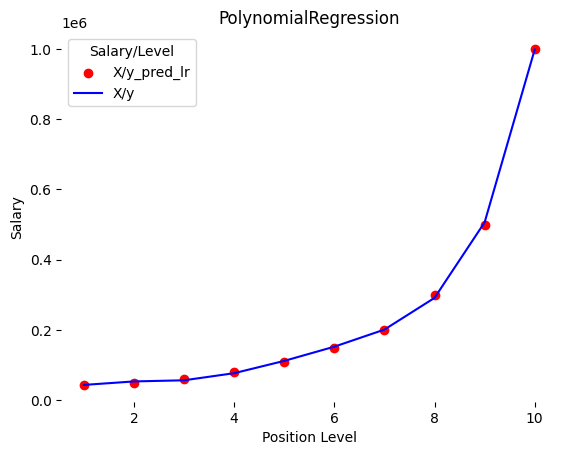

In [25]:
#prediction with polynomial regression
plt.scatter(X,y,color='red')
plt.plot(X,y_pred_poly,color='blue')
plt.title('PolynomialRegression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred_lr','X/y'],title="Salary/Level", loc='best',facecolor='white')
plt.box(False)
plt.show()

test with an example

In [26]:
print(f'linear reg result:{lr.predict([[6.5]])}')
print(f'polynomial reg result:{lr2.predict(pr.fit_transform([[6.5]]))}')

linear reg result:[330378.78787879]
polynomial reg result:[174878.07765173]


c:\Users\ASUS PC\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
